<a href="https://colab.research.google.com/github/salmanbhatti87/CodeSoft/blob/main/new_resnet50_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:
# Download and extract the dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=dataset_url, extract=True)
dataset_dir = os.path.join(os.path.dirname(dataset_path), 'cats_and_dogs_filtered')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for metrics
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Load ResNet50 with correct input shape
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze pretrained layers
#

In [ ]:
# Build your model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(
    train_data,
    epochs=100,
    validation_data=validation_data
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 645ms/step - accuracy: 0.5118 - loss: 0.7457 - val_accuracy: 0.5950 - val_loss: 0.6812
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 434ms/step - accuracy: 0.5317 - loss: 0.6886 - val_accuracy: 0.5250 - val_loss: 0.6845
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 452ms/step - accuracy: 0.5494 - loss: 0.6884 - val_accuracy: 0.5820 - val_loss: 0.6757
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 432ms/step - accuracy: 0.5806 - loss: 0.6766 - val_accuracy: 0.6180 - val_loss: 0.6683
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 438ms/step - accuracy: 0.5572 - loss: 0.6799 - val_accuracy: 0.6150 - val_loss: 0.6754
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 439ms/step - accuracy: 0.5673 - loss: 0.6808 - val_accuracy: 0.6130 - val_loss: 0.6681
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 459ms/step - accuracy: 0.5699 - loss: 0.6812 - val_accuracy: 0.6170 - val_loss: 0.6701
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 457ms/step - accuracy: 0.5784 - loss: 0.6748 - 

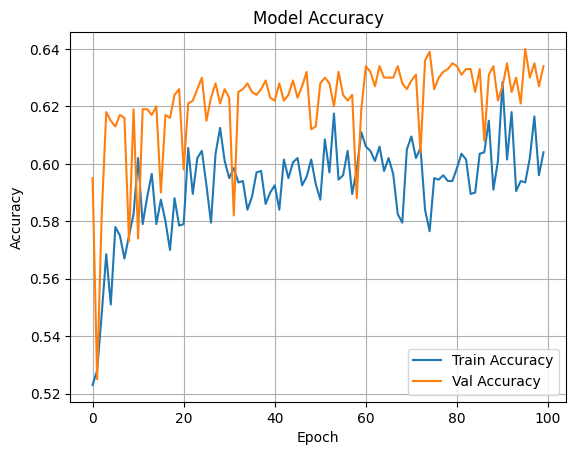

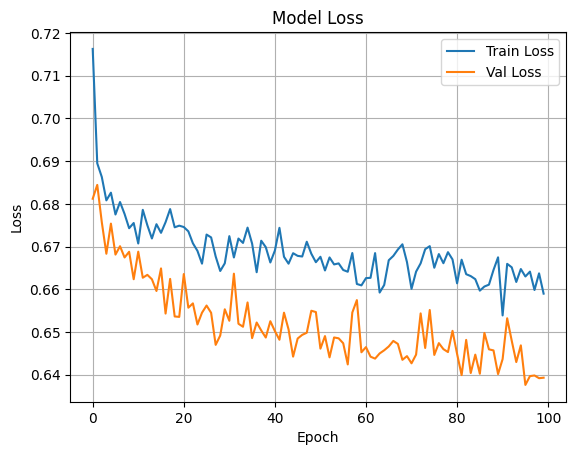

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step

Classification Report:

              precision    recall  f1-score   support

        cats       0.62      0.68      0.65       500
        dogs       0.65      0.59      0.62       500

    accuracy                           0.63      1000
   macro avg       0.64      0.63      0.63      1000
weighted avg       0.64      0.63      0.63      1000



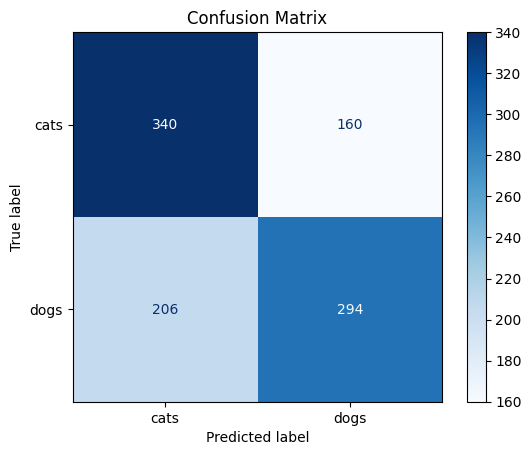

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predicted labels from validation data
validation_data.reset()
y_true = validation_data.classes
y_pred_probs = model.predict(validation_data)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=validation_data.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()